In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datamodules import data_processors
from sklearn.feature_selection import mutual_info_regression
import sys
print(sys.version)

3.13.2 (main, Feb  4 2025, 00:00:00) [GCC 14.2.1 20250110 (Red Hat 14.2.1-7)]


In [2]:
path_archivo = "../input_data/combi_500_100.csv"
path_rand1 = "../input_data/uni_52500_2.csv"
path_rand2 = "../input_data/uni_cp_2.csv"
path_rand3 = "../input_data/uni_cp_3.csv"
path_rand4 = "../input_data/uni_cp_4.csv"
path_rand5 = "../input_data/uni_cp_5.csv"
datos_combi  = pd.read_csv(path_archivo)
datos_rand1 = pd.read_csv(path_rand1)
datos_rand2 = pd.read_csv(path_rand2)
datos_rand3 = pd.read_csv(path_rand3)
datos_rand4 = pd.read_csv(path_rand4)
datos_rand5 = pd.read_csv(path_rand5)
datos_full = pd.concat((datos_rand1, datos_rand2, datos_rand3, datos_rand4, datos_rand5), axis = 0)

In [3]:
N_eig = 5
features = ["eta", "beta"] + list(map(lambda x: "eig_" + str(x + 1), range(N_eig )))
target = ["phi_K"]
datos_full = datos_full[target + ["eig_0"] + features]

In [4]:
datos_full

,phi_K,eig_0,eta,beta,eig_1,eig_2,eig_3,eig_4,eig_5
0,0.165424,0.005375,1.132831,0.543445,1.184132,5.444006,7.955450,8.283990,13.134579
1,0.121428,0.291748,1.479412,2.797353,1.657349,1.899726,2.873234,3.076154,3.214761
2,1.530230,0.001063,0.564550,0.878855,11.230389,12.680632,25.783795,49.495598,52.898031
3,0.243054,0.289631,1.296722,2.099597,1.415962,2.349333,3.986708,4.031452,4.113811
4,1.229972,0.000189,0.365609,0.560918,8.086755,16.593282,33.347106,41.940437,70.928704
...,...,...,...,...,...,...,...,...,...
49995,0.627075,0.026385,1.769564,0.432316,1.663366,3.696286,5.626107,7.206137,12.414807
49996,1.143186,0.761896,1.897796,1.282048,1.123735,2.434638,2.777298,3.794824,3.873803
49997,0.904310,0.019567,1.121554,0.526898,1.149054,5.730591,6.252395,7.474901,10.489442
49998,0.193899,0.026919,0.795474,1.530906,1.675355,3.654694,6.433660,7.328446,10.917851


In [5]:
datos_full = data_processors.preprocess_data(datos_full, N_eig, target)
X = datos_full[features]
y = datos_full[target]

In [6]:
datos_full

,phi_K,eig_0,eta,beta,eig_1,eig_2,eig_3,eig_4,eig_5,x_0,x_1,x_2,x_3,x_4,x_5
0,0.105312,0.005375,1.132831,0.543445,0.844500,0.217511,0.684312,0.960340,0.630701,0.076135,0.014019,0.324325,0.191209,0.025013,0.369299
1,0.077303,0.291748,1.479412,2.797353,0.603373,0.872415,0.661181,0.934034,0.956884,0.311065,0.204479,0.075395,0.302824,0.063121,0.043116
2,0.974175,0.001063,0.564550,0.878855,0.089044,0.885633,0.491806,0.520931,0.935679,0.018904,0.193398,0.027416,0.247706,0.448255,0.064321
3,0.154733,0.289631,1.296722,2.099597,0.706234,0.602708,0.589291,0.988901,0.979980,0.243084,0.101114,0.226887,0.398019,0.010877,0.020020
4,0.783024,0.000189,0.365609,0.560918,0.123659,0.487351,0.497593,0.795106,0.591304,0.014099,0.099914,0.119931,0.236207,0.121154,0.408696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.399208,0.026385,1.769564,0.432316,0.601191,0.450010,0.656988,0.780738,0.580447,0.080549,0.053433,0.163750,0.155445,0.127270,0.419553
49996,0.727775,0.761896,1.897796,1.282048,0.889890,0.461561,0.876621,0.731865,0.979612,0.258144,0.031941,0.338402,0.088456,0.262669,0.020388
49997,0.575701,0.019567,1.121554,0.526898,0.870281,0.200512,0.916543,0.836452,0.712612,0.095334,0.014210,0.436776,0.049746,0.116546,0.287388
49998,0.123440,0.026919,0.795474,1.530906,0.596888,0.458412,0.568058,0.877902,0.671235,0.091593,0.061858,0.181294,0.254534,0.081956,0.328765


In [7]:
X.head()

,eta,beta,eig_1,eig_2,eig_3,eig_4,eig_5
0,1.132831,0.543445,0.844500,0.217511,0.684312,0.960340,0.630701
1,1.479412,2.797353,0.603373,0.872415,0.661181,0.934034,0.956884
2,0.564550,0.878855,0.089044,0.885633,0.491806,0.520931,0.935679
3,1.296722,2.099597,0.706234,0.602708,0.589291,0.988901,0.979980
4,0.365609,0.560918,0.123659,0.487351,0.497593,0.795106,0.591304


In [8]:
y.head()

,phi_K
0,0.105312
1,0.077303
2,0.974175
3,0.154733
4,0.783024


In [10]:
MI_data = mutual_info_regression(X, y[target], n_jobs=-1)

/home/cubos/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
symbols_comp = dict(map(lambda x: ("eig_" + str(x+1), r"$\xi_{%d}$" % x), range(N_eig)))
symbols_target = r"$\varphi_K$"
symbols_features = {"eta": r"$\eta$", "beta": r"$\beta$", **symbols_comp}

In [16]:
MI_data

array([8.23780098e-05, 0.00000000e+00, 1.14934474e-01, 3.95787256e-02,
       4.82168345e-02, 2.92320552e-02, 2.96698447e-02])

Text(0.5, 1.0, 'Mutual info between $\\varphi_K$ and:')

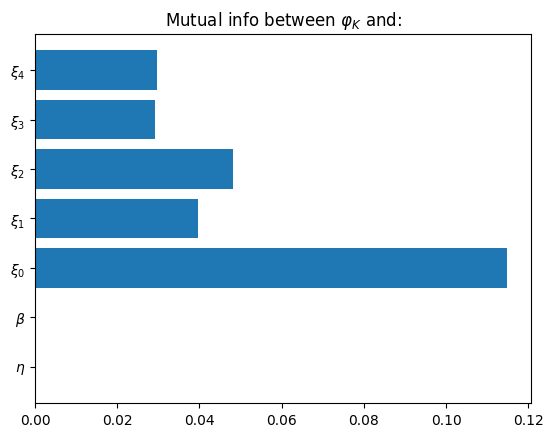

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(symbols_features.values(), MI_data)
ax.set_title("Mutual info between " + symbols_target + " and:")